In [17]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


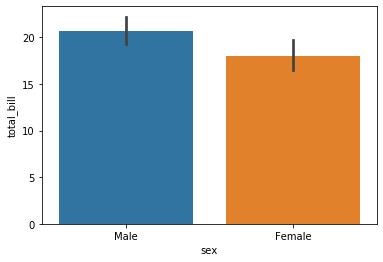

In [2]:
sns.barplot(x='sex',y='total_bill',data=tips)

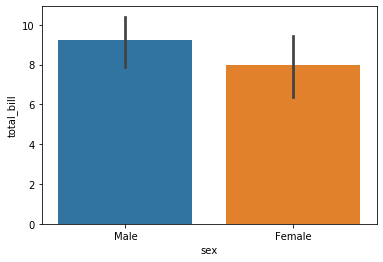

In [3]:
import numpy as np
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std)

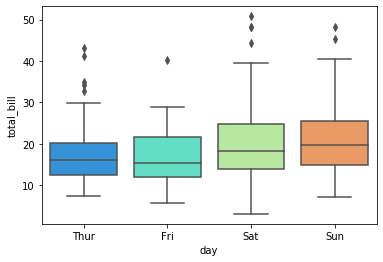

In [4]:
sns.boxplot(x='day', y='total_bill', data=tips, palette='rainbow')

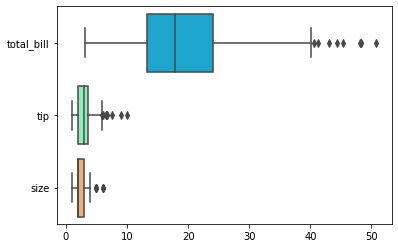

In [5]:
sns.boxplot(data=tips, palette='rainbow', orient='h')

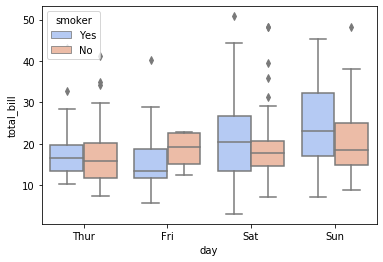

In [6]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker', palette='coolwarm')

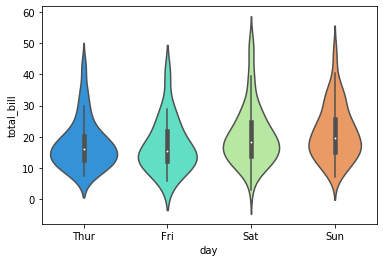

In [7]:
sns.violinplot(x='day', y='total_bill', data=tips, palette='rainbow')

In [10]:
youtube = pd.read_csv('/Users/muhammadramzy/Documents/PWDK/USvideos.csv')

In [11]:
youtube.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [15]:
def make_bootstrap(n_size, n_boot, ci, data):
    mean_boot=[]
    for i in range(n_boot):
        mean_boot.append(data.sample(n_size, replace = True).mean())
        
    level = 100*((1-ci)/2)
    upper_level = 100 - level
    lower_level = 0 + level
    
    return {'lower_conf_int':np.percentile(mean_boot,lower_level),
            'upper_conf_int':np.percentile(mean_boot,upper_level)}
make_bootstrap(len(youtube[youtube['comments_disabled'] == False]),
              1000,0.95, youtube[youtube['comments_disabled']==False]['likes'])

{'lower_conf_int': 72857.44226919833, 'upper_conf_int': 77287.44094652246}

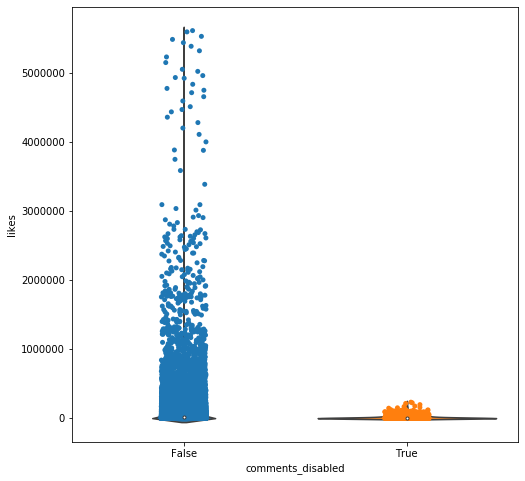

In [24]:
plt.figure(figsize=(8,8))
sns.stripplot(data=youtube,x='comments_disabled',y='likes',jitter=True)
sns.violinplot(data=youtube,x='comments_disabled',y='likes')